# 1.Loading the dataset: Load the data and import the libraries.


# 2.Data Cleaning:

**1).Deleting redundant columns.**

**2).Renaming the columns.**

**3).Dropping duplicates.**

**4).Cleaning individual columns.**

**5).Remove the NaN values from the dataset.**


# Some Transformations


# 3.Regression Analysis

***1.Linear Regression***

***2.Decision Tree Regression***

***3.Random Forest Regression***

# 4.Data Visualization: Using plots to find relations between the features.


## 1.Restaurants delivering Online or not
## 2.Resturants allowing table booking  or not
## 3.location percentage
## 4.Number of Restaurants in given location
## 5.Type of Restaurant in City(%)
## 6.Number of Restaurants in given location
## 7.Type of Restaurant in City(%)
## 8.Restaurent type vs Rate
## 9.No of restaurants
## 10.Word Cloud for cuisines

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [2]:
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head() # prints the first N rows of a DataFrame


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_real.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"


In [5]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)


In [6]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [7]:
#Reading Column Names
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [9]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [10]:
#Reading Rate of dataset
zomato['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
zomato['online_order'] = zomato['online_order'].replace(('Yes', 'No'), (True, False))
zomato['book_table'] = zomato['book_table'].replace(('Yes', 'No'), (True, False))

C:\Users\Arman\AppData\Local\Temp\ipykernel_2872\1555498701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zomato['online_order'] = zomato['online_order'].replace(('Yes', 'No'), (True, False))
C:\Users\Arman\AppData\Local\Temp\ipykernel_2872\1555498701.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zomato['book_table'] = zomato['book_table'].replace(('Yes', 'No'), (True, False))


In [13]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

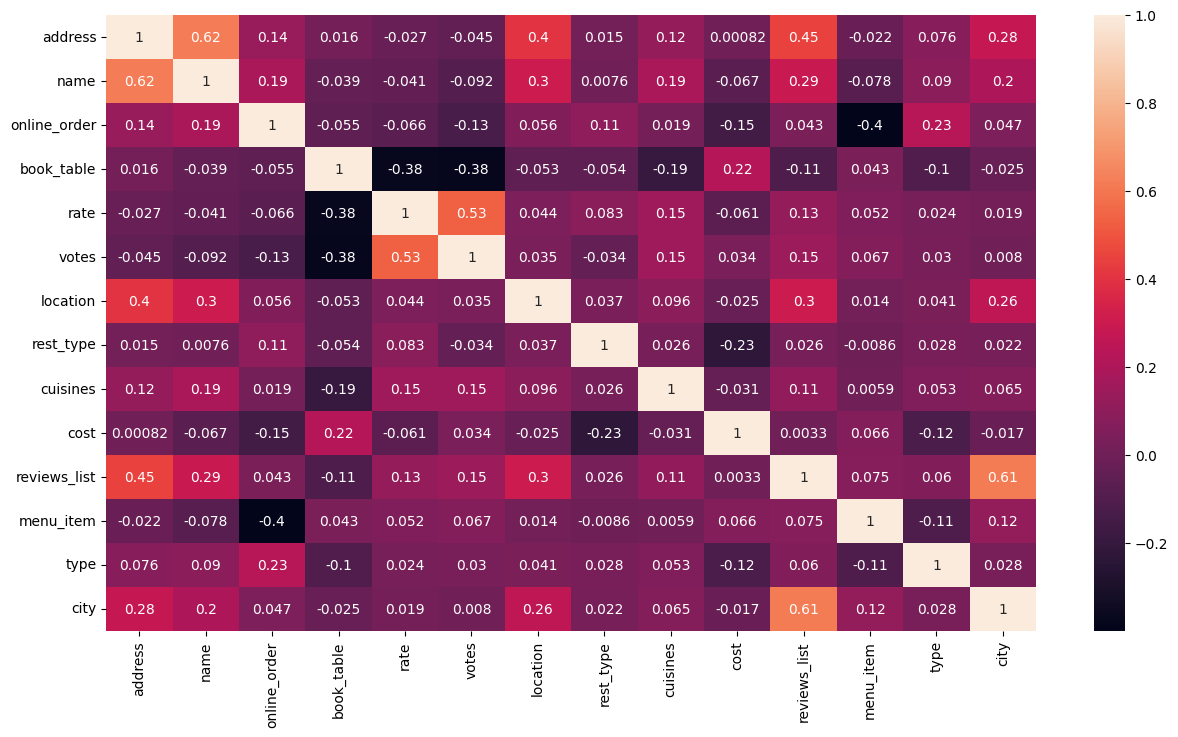

In [14]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.savefig("correlation.png")
zomato_en.columns


In [15]:
df=zomato


In [16]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']


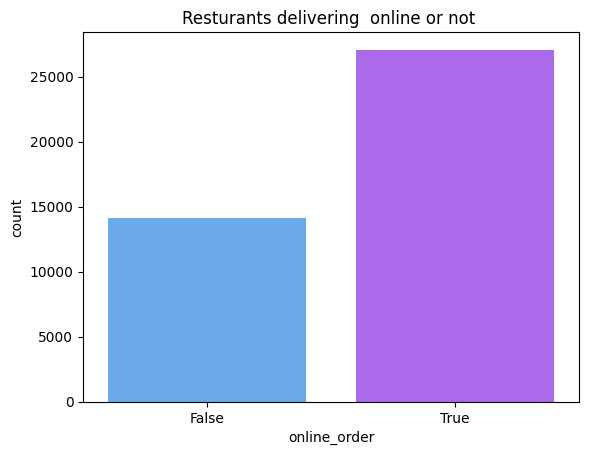

In [17]:
#Resturants deliveriing Oline or not 
sns.countplot(x='online_order' , hue='online_order', data=df, palette='cool' , legend=False)
plt.title('Resturants delivering  online or not ')
plt.show()

## 1.Restaurants allowing table booking or not


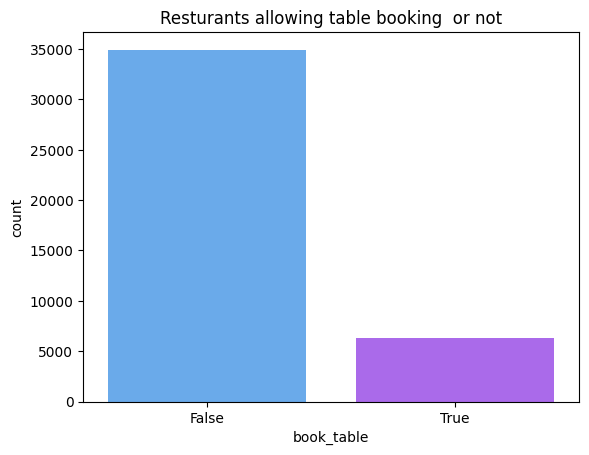

In [18]:
#Resturants allowing table booking  or not 
sns.countplot(x='book_table' , hue='book_table', data=df, palette='cool' , legend=False)
plt.title('Resturants allowing table booking  or not')
plt.show()

## 2.Table booking Rate vs Rate


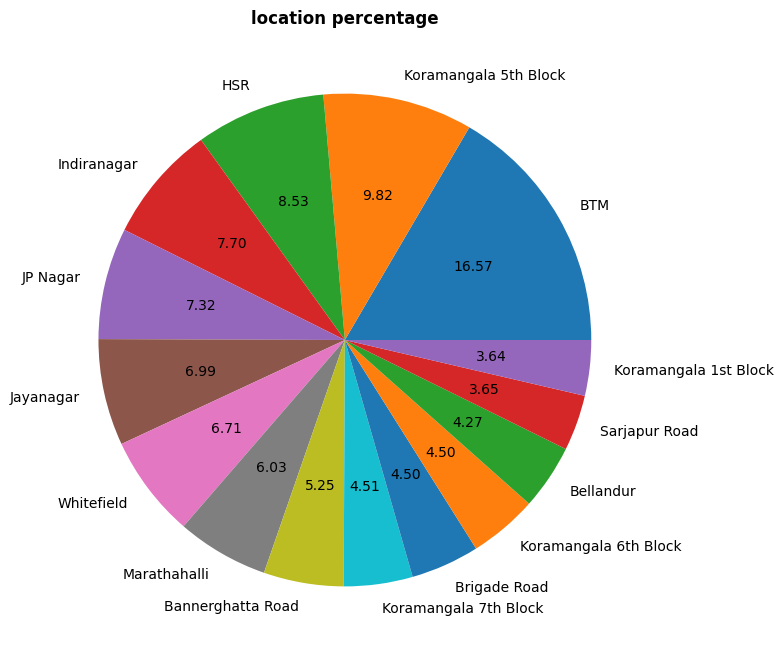

In [19]:
plt.figure(figsize=(8,8))
values = df.location.value_counts()[:15]
labels = df['location'].value_counts()[:15].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('location percentage', weight='bold')
plt.show()


## 3.We can say that BTM location, where most of restaurant are available


Text(0, 0.5, 'counts')

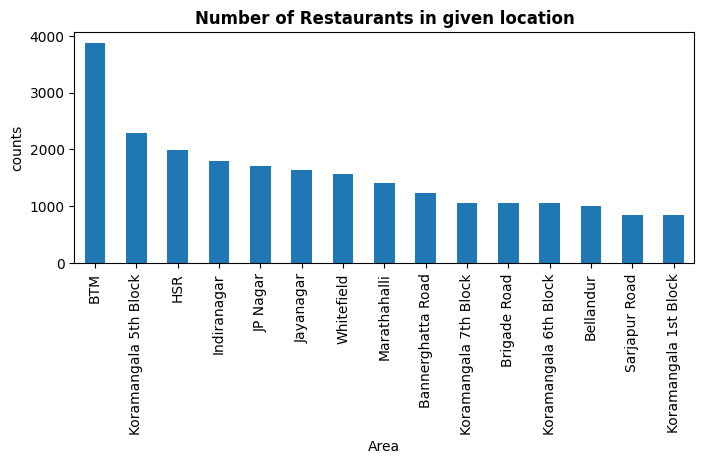

In [20]:
plt.figure(figsize=(8,3))
ax =df.location.value_counts()[:15].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

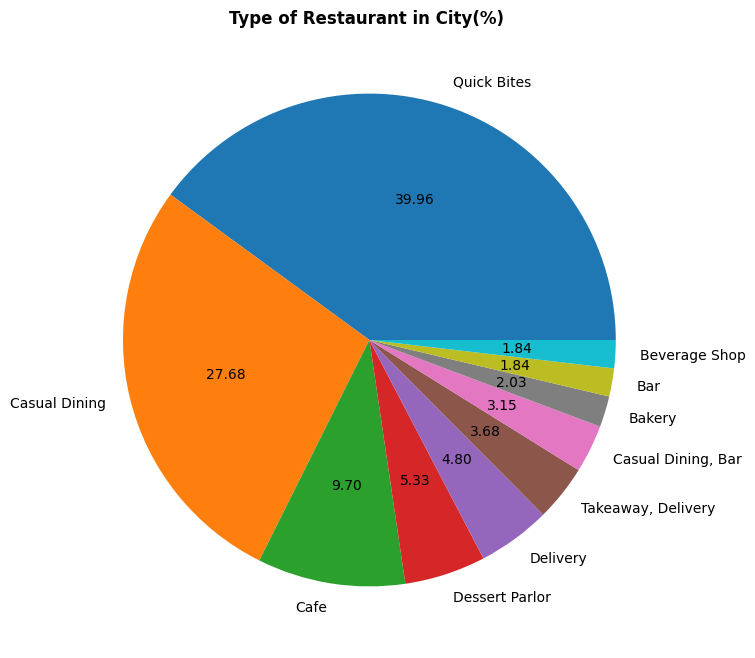

In [21]:
plt.figure(figsize=(8,8))
values = df.rest_type.value_counts()[:10]
labels = df['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()


Text(0, 0.5, 'counts')

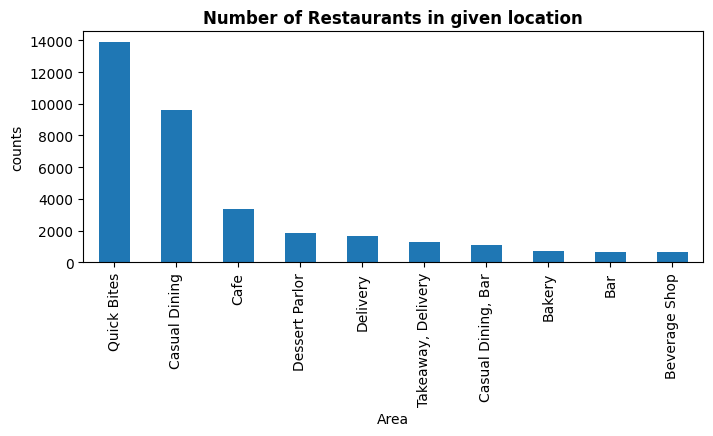

In [22]:
plt.figure(figsize=(8,3))
ax =df.rest_type.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location' , weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')


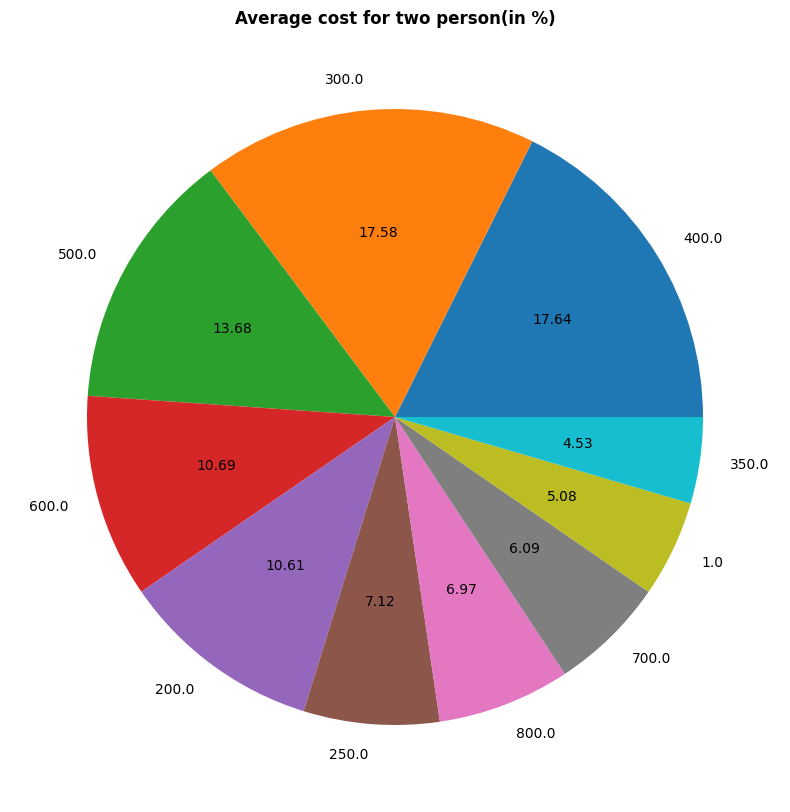

In [23]:
plt.figure(figsize=(10,10))
values = df['cost'].value_counts().head(10)
labels = df['cost'].value_counts().head(10).index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %)', weight='bold')
plt.show()

## 7.There is 17.58% percetage chances that for two person average cost will be 400 and 17.64% chance that cost will be 300. so on.


C:\Users\Arman\AppData\Local\Temp\ipykernel_2872\2328466194.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


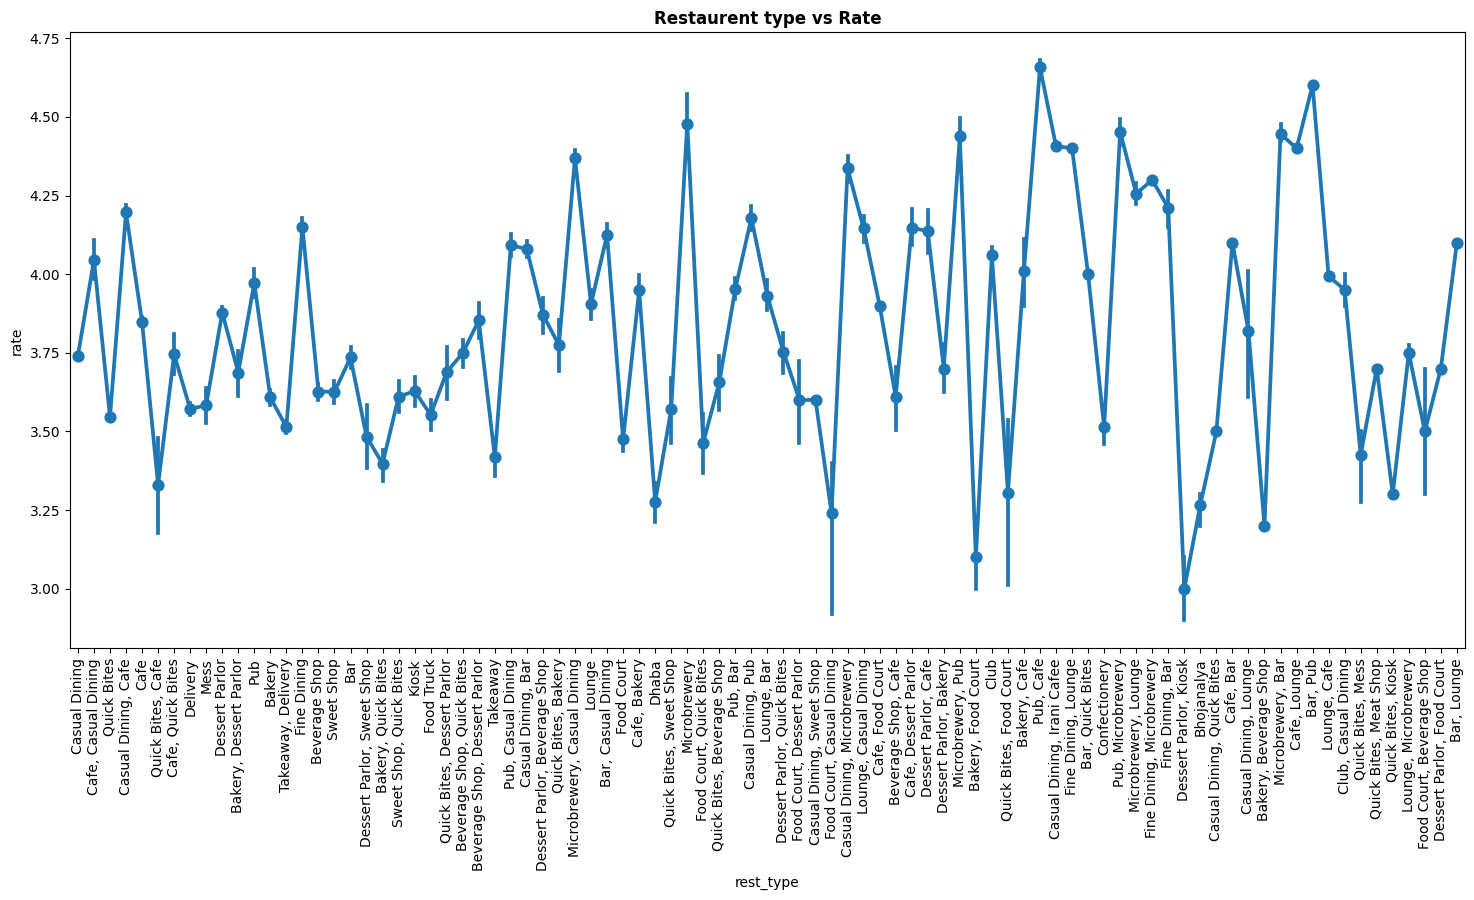

In [24]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()


In [25]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [26]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)


Text(0, 0.5, 'No of restaurants')

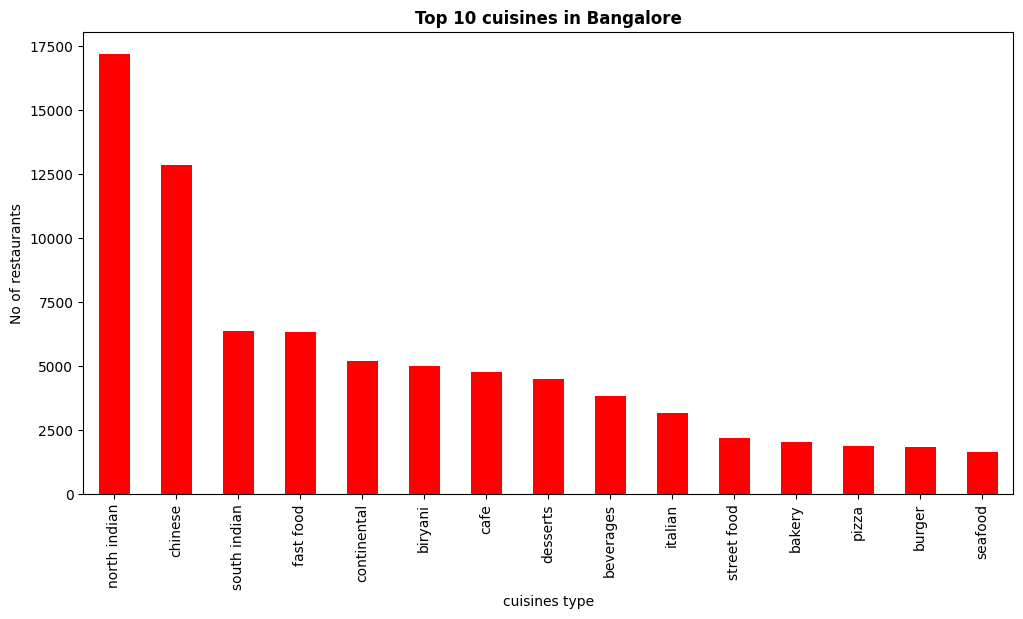

In [27]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:15].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')


## 9.North Indian food is at top, followed by chinease and so on.


In [28]:
cuisines_set = set(cuisines_count)
cuisines_word_cloud = ', '.join(cuisines_set)


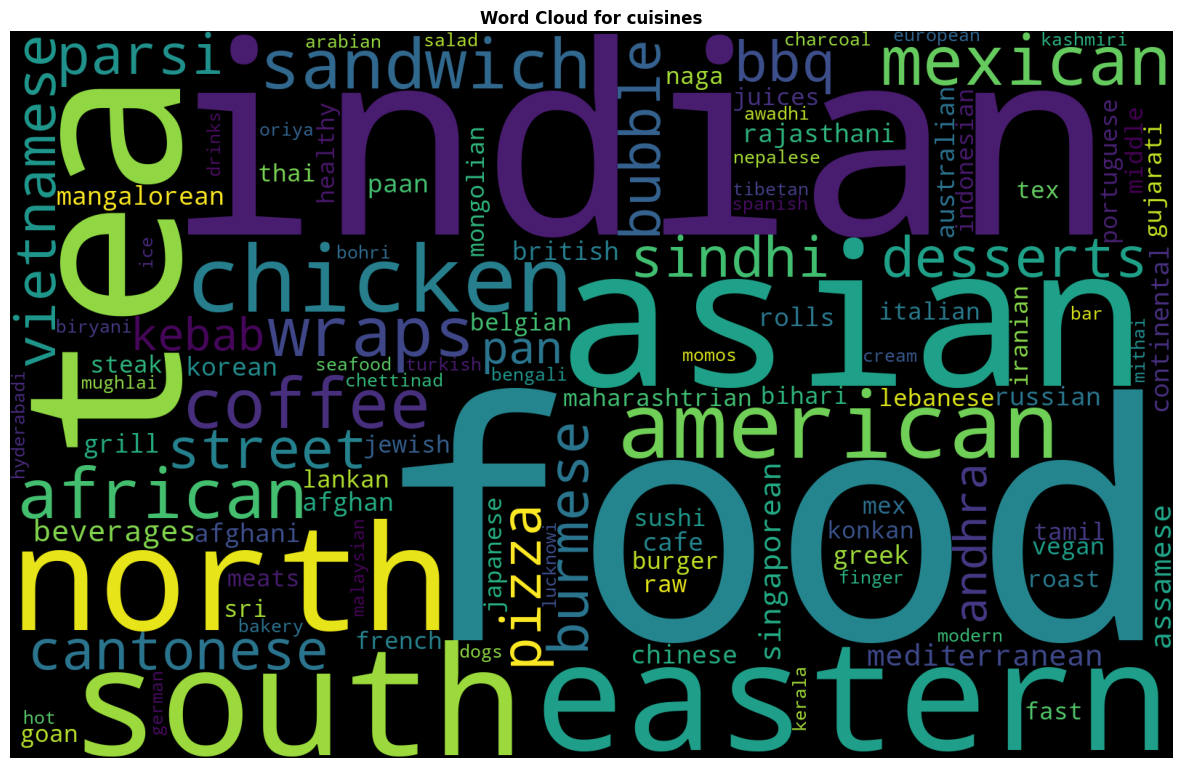

In [29]:
from wordcloud import WordCloud

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(cuisines_word_cloud))
wc.generate(cuisines_word_cloud)
plt.title('Word Cloud for cuisines',weight='bold')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(wc)
plt.show()

##  Splitting the Dataset

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


In [31]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()


16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

# Modal

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor


# Linear Regression

In [33]:
 #Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.273623372210398

# Decision Tree Regression

In [34]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.8550273216065792

# Extra Tree Regression


In [35]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.9389791759018923

# Random Forest Regression

In [36]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.8774279501872895

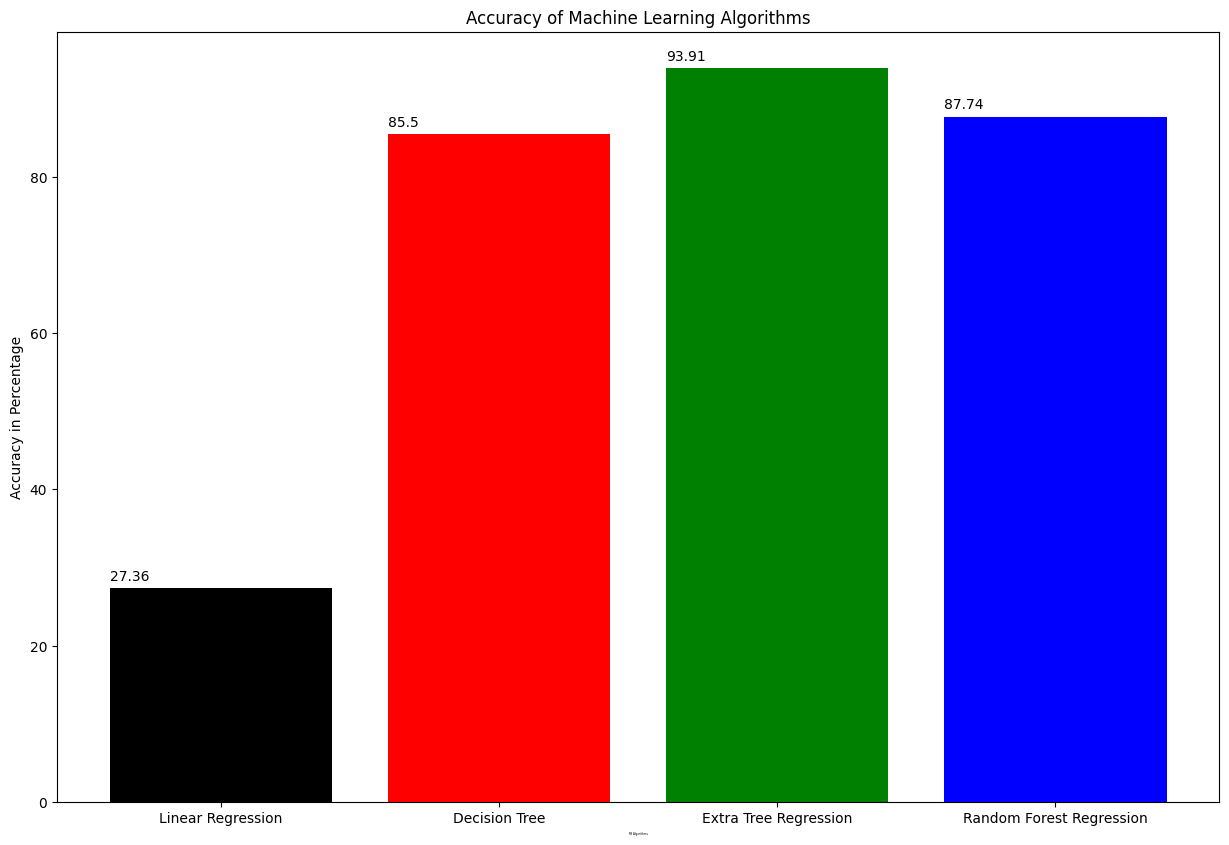

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = [27.36, 85.50, 93.91, 87.74,]
bars = ('Linear Regression', 'Decision Tree', 'Extra Tree Regression', 'Random Forest Regression')
plt.figure(figsize=(15,10))
y_pos = np.arange(len(bars))
bars = plt.bar(bars,height=accuracy, color=['black', 'red', 'green', 'blue'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1,yval)

#plt.xticks(y_pos, bars)
plt.xlabel("Ml Algorithms",fontsize=2)
plt.ylabel("Accuracy in Percentage")
plt.title("Accuracy of Machine Learning Algorithms")
plt.show()